# 机器学习建模

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles,make_blobs,make_moons

## 无监督学习-聚类

### K-means

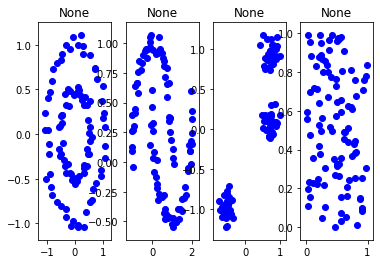

In [23]:
from sklearn.cluster import KMeans
# 生成数据
n_samples = 100
circles = make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons = make_moons(n_samples=n_samples,noise=0.05)
blobs = make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data = np.random.rand(n_samples,2),None

# 引入模型
colors = 'bgrcmyk'
data = [circles,moons,blobs,random_data]
models = [('None',None)]

# 进行聚类并画图
def cluster_show():
    f = plt.figure()
    for inx,clt in enumerate(models):
        clt_name,clt_entity = clt
        for i,dataset in enumerate(data):
            X,Y = dataset
            if not clt_entity:
                clt_res = [0 for item in range(len(X))]
            else:
                clt_entity.fit(X)
                clt_res = clt_entity.labels_.astype(np.int)
            f.add_subplot(len(models),len(data),inx*len(data)+i+1)
            plt.title(clt_name)
            [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
    plt.show()

cluster_show()

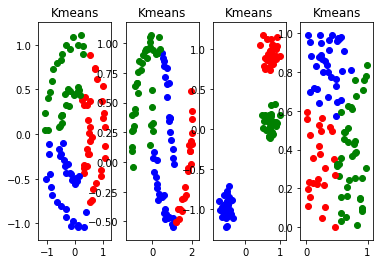

In [27]:
models = []
models.append(('Kmeans',KMeans(n_clusters=3)))
cluster_show()

### DBSCAN

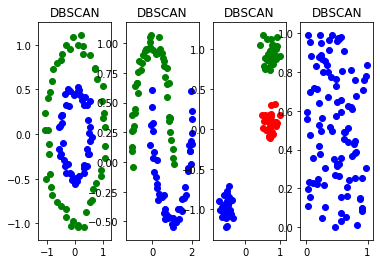

In [28]:
from sklearn.cluster import DBSCAN
models = []
models.append(('DBSCAN',DBSCAN(min_samples=3,eps=0.3)))
cluster_show()

### 层次聚类

f:\condaenv\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


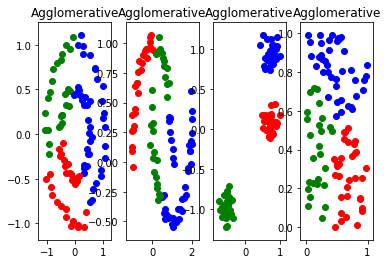

In [29]:
from sklearn.cluster import AgglomerativeClustering
models = []
models.append(('Agglomerative',AgglomerativeClustering(n_clusters=3,linkage='ward')))
cluster_show()

## 半监督学习

### 标签传播算法

In [31]:
# 导入数据集
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
# 随机选一部分点改为无标签
labels = np.copy(iris.target)
random_unlabeled_points = np.random.rand(len(iris.target))
random_unlabeled_points = random_unlabeled_points<0.3
Y = labels[random_unlabeled_points]
labels[random_unlabeled_points] = -1
print('Unlabeled Number:',list(labels).count(-1))
random_unlabeled_points

Unlabeled Number: 39


array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,

In [38]:
labels

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1,  2,
       -1,  2, -1,  2, -1, -1, -1,  2,  2,  2, -1,  2, -1, -1,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,  2,  2,  2])

In [43]:
# 标签传播算法
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation()
label_prop_model.fit(iris.data,labels)
Y_pred = label_prop_model.predict(iris.data)
Y_pred = Y_pred[random_unlabeled_points]

In [44]:
# 模型评估
from sklearn.metrics import accuracy_score,recall_score,f1_score
print('ACC:',accuracy_score(Y,Y_pred))
print('REC:',recall_score(Y,Y_pred,average='micro'))
print('F-Score:',f1_score(Y,Y_pred,average='micro'))

ACC: 0.9743589743589743
REC: 0.9743589743589743
F-Score: 0.9743589743589743
